**Analysis of SNN simulations**

Note: this notebook is to be run with the MATLAB kernel

In [1]:
%%  Analysis of spike and weight data to identify feature selective neurons
clc; close all; clear all

% % parameters
N_images = 16;
show_time = 1;                                                % length of time stimulus is presented for (in seconds)
period = N_images*show_time;         % length of an epoch (in seconds)
N_epochs = 10+1;                                          % add 1 for test epoch 

In [2]:
% specify directory to fetch data from
data_dir = '5534881.pbs/output_data'


data_dir =

    '5534881.pbs/output_data'



In [3]:
%% read spike data and isolate by epoch and image stimulus 

spikes_names = {'L0';'L1e';'L1i';'L2e';'L2i';'L3e';'L3i';'L4e';'L4i'};  % names 

% layer 0 spikes
L0_spikes = importdata([data_dir '/layer_0_full_spikes.csv']);
L0_spikes_epoch_idx{1} = 1;
L0_spikes_im_idx{1} = 1;
for epoch = 1:N_epochs % loop through epochs and isolate spikes for given epoch
    L0_spikes_epoch_idx{epoch+1} = find(L0_spikes(2,:)>period*epoch,1);
    L0_spikes_epoch = L0_spikes(:,L0_spikes_epoch_idx{epoch}:L0_spikes_epoch_idx{epoch+1});
    for im = 1:N_images % loop through images and isolate spikes for given image within epoch
        L0_spikes_im_idx{im+1} = find(L0_spikes_epoch(2,:)>(period*(epoch-1) + show_time*im),1);
        L0_spikes_im = L0_spikes_epoch(:,L0_spikes_im_idx{im}:L0_spikes_im_idx{im+1});
        spikes{1,epoch,im} = L0_spikes_im; % store spikes for L0 for given epoch and image
    end
end

% layers 1-4 exc and inh spikes
for i = 1:4 % loop through layers 1-4

    % excitatory layers
    exc_spikes = importdata([data_dir '/layer_' num2str(i) '_excitatory_full_spikes.csv']);
    exc_spikes_epoch_idx{1} = 1;
    exc_spikes_im_idx{1} = 1;
    for epoch = 1:N_epochs % loop through epochs and isolate spikes for given epoch
        exc_spikes_epoch_idx{epoch+1} = find(exc_spikes(2,:)>period*epoch,1);
        exc_spikes_epoch = exc_spikes(:,exc_spikes_epoch_idx{epoch}:exc_spikes_epoch_idx{epoch+1});
        for im = 1:N_images % loop through images and isolate spikes for given image within epoch
            exc_spikes_im_idx{im+1} = find(exc_spikes_epoch(2,:)>(period*(epoch-1) + show_time*im),1);
            exc_spikes_im = exc_spikes_epoch(:,exc_spikes_im_idx{im}:exc_spikes_im_idx{im+1});
            spikes{2*i,epoch,im} = exc_spikes_im; % store spikes for L0 for given epoch and image
        end
    end
        
    % inhibitory layers
    inh_spikes = importdata([data_dir '/layer_' num2str(i) '_inhibitory_full_spikes.csv']);
    inh_spikes_epoch_idx{1} = 1;
    inh_spikes_im_idx{1} = 1;
    for epoch = 1:N_epochs % loop through epochs and isolate spikes for given epoch
        inh_spikes_epoch_idx{epoch+1} = find(inh_spikes(2,:)>period*epoch,1);
        inh_spikes_epoch = inh_spikes(:,inh_spikes_epoch_idx{epoch}:inh_spikes_epoch_idx{epoch+1});
        for im = 1:N_images % loop through images and isolate spikes for given image within epoch
            inh_spikes_im_idx{im+1} = find(inh_spikes_epoch(2,:)>(period*(epoch-1) + show_time*im),1);
            inh_spikes_im = inh_spikes_epoch(:,inh_spikes_im_idx{im}:inh_spikes_im_idx{im+1});
            spikes{(2*i)+1,epoch,im} = inh_spikes_im; % store spikes for L0 for given epoch and image
        end
    end
    
end

In [4]:
spks = spikes{1,1,1};
idx = spks(1,:)+1;
simulation_time = 1;

In [5]:
neurons = [1:1048576];
N_spikes = zeros(1,length(neurons));
for i=idx
    N_spikes(1,i) = N_spikes(1,i)+1;
end
for i=neurons
    the_rates(i) = N_spikes(i)/simulation_time;
end

In [6]:
%% read weights data

% layer 0 to 1 exc
for epoch = 1:N_epochs-1 % loop through epochs (but do not include test epoch)
    idx_pre = importdata([data_dir '/layer_0_layer_1_exc_weights_8s_idx_pre_epoch_' num2str(epoch-1) '.csv']);
    x = importdata([data_dir '/layer_0_layer_1_exc_weights_8s_x_pre_epoch_' num2str(epoch-1) '.csv']);

y = importdata([data_dir '/layer_0_layer_1_exc_weights_8s_y_pre_epoch_' num2str(epoch-1) '.csv']);
    idx_post = importdata([data_dir '/layer_0_layer_1_exc_weights_8s_idx_post_epoch_' num2str(epoch-1) '.csv']);
    f = importdata([data_dir '/layer_0_layer_1_exc_weights_8s_f_pre_epoch_' num2str(epoch-1) '.csv']);
    w = importdata([data_dir '/layer_0_layer_1_exc_weights_8s_w_epoch_' num2str(epoch-1) '.csv']);
    weights{1,epoch} = [idx_pre; x; y; idx_post; f; w];
end

% rest of layers
for i = 1:3 % loop through layers
    for epoch = 1:N_epochs-1 % loop through epochs (but do not include test epoch)
        w = importdata([data_dir '/layer_' num2str(i) '_exc_layer_' num2str(i+1) '_exc_weights_8s_epoch_' num2str(epoch-1) '.csv']);
        weights{i+1,epoch} = w;
    end
end

In [7]:
exist([data_dir '/layer_0_layer_1_exc_weights_8s_x_pre_epoch_0.csv'],'file')


ans =

     2



In [8]:
% rest of layers
for i = 1:3 % loop through layers
    for epoch = 1:N_epochs-1 % loop through epochs (but do not include test epoch)
        w = importdata([data_dir '/layer_' num2str(i) '_exc_layer_' num2str(i+1) '_exc_weights_8s_epoch_' num2str(epoch-1) '.csv']);
        weights{i+1,epoch} = w;
    end
end

In [9]:
%% calculate average firing rates for neurons for each image
N_neurons = [1048576,4096,1024,4096,1024,4096,1024,4096,1024]; % number of neurons in each layer (find a better way to do this than hard-coding)
for layer = 1:9
    for epoch = 1:N_epochs
        for im = 1:N_images
            [nrns,count,the_rates] = get_rates(spikes{layer,epoch,im},N_neurons(layer),show_time);
            rates{layer,epoch,im} = {nrns;count;the_rates};
        end
    end
end

In [10]:
%% calculate average firing rates across all epochs and images
ave_rates = {};
for layer = 1:9
    sum_rates = zeros(1,length(rates{layer,1,1}{1}));
    for epoch = 1:N_epochs
        for im = 1:N_images
            sum_rates = sum_rates + rates{layer,epoch,im}{3};
        end
    end
    ave_rates{layer} = sum_rates./(N_epochs*N_images);
end

In [11]:
spikes_names


spikes_names =

  9x1 cell array

    {'L0' }
    {'L1e'}
    {'L1i'}
    {'L2e'}
    {'L2i'}
    {'L3e'}
    {'L3i'}
    {'L4e'}
    {'L4i'}



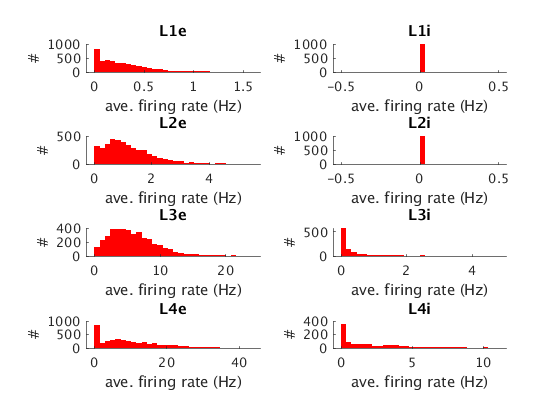

In [12]:
%% plot average firing rates

% figure('Renderer', 'painters', 'Position', [10 10 600 150])
% box off
% histogram(ave_rates{1},30,'EdgeColor','none','FaceColor',[1 0 0],'FaceAlpha',1);
% xlabel('ave. firing rate (Hz)')
% ylabel('#')
% title(spikes_names{1})
% box off
% set(gcf, 'Renderer', 'Painters');

figure('Renderer', 'painters', 'Position', [10 10 600 150])
for i = 1:8
    subplot(4,2,i)
    box off
    histogram(ave_rates{i+1}, 30, 'EdgeColor', 'none', 'FaceColor', [1 0 0], 'FaceAlpha', 1);
    xlabel('ave. firing rate (Hz)')
    ylabel('#')
    title(spikes_names{i+1})
    box off
    set(gcf, 'Renderer', 'Painters');
end


In [13]:
%% plot firing rate through time


nrn =

        1981



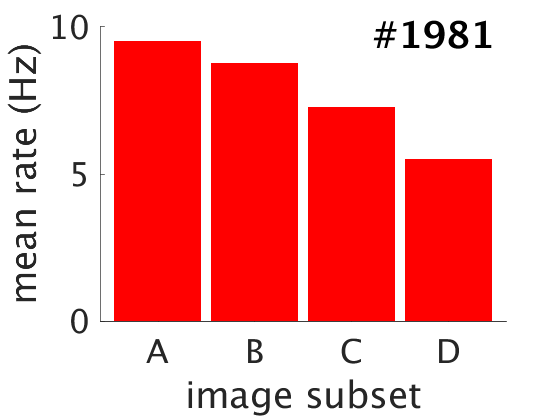

In [251]:
%% find selective L3 neurons

% define layer here
lay = 'L3e';
lay = find(strcmp(spikes_names,'L3e') == 1); % get layer index

% define image sets
set1 = [12,3,15,5];
set2 = [12,3,15,1];
set3 = [12,3,4,1];
set4 = [12,11,4,1];

% get average firing rates for specific image sets (see lab notebook)
rates_test_set1 = (rates{lay,end-1,set1(1)}{3}+rates{lay,end-1,set1(2)}{3}+rates{lay,end-1,set1(3)}{3}+rates{lay,end-1,set1(4)}{3})/4;
rates_test_set2 = (rates{lay,end-1,set2(1)}{3}+rates{lay,end-1,set2(2)}{3}+rates{lay,end-1,set2(3)}{3}+rates{lay,end-1,set2(4)}{3})/4;
rates_test_set3 = (rates{lay,end-1,set3(1)}{3}+rates{lay,end-1,set3(2)}{3}+rates{lay,end-1,set3(3)}{3}+rates{lay,end-1,set3(4)}{3})/4;
rates_test_set4 = (rates{lay,end-1,set4(1)}{3}+rates{lay,end-1,set4(2)}{3}+rates{lay,end-1,set4(3)}{3}+rates{lay,end-1,set4(4)}{3})/4;

selective = [];
 
neuron_num = [1:4096];
 
for num = neuron_num
    if rates_test_set1(num) >  rates_test_set2(num) && rates_test_set2(num) > rates_test_set3(num)  && rates_test_set3(num) > rates_test_set4(num) && rates_test_set4(num) ~= 0
        selective = [selective,num];
    end
end

nrn = selective(241)

for num = nrn
%     figure('Position',[3000,600,200,200])
    figure('Position',[0,0,10,10])
    hold on
    data = [rates_test_set1(num),rates_test_set2(num),rates_test_set3(num),rates_test_set4(num)];%,L3e_rates_test_set4(num)]; 
    b = bar([1:4],data,0.9);
    b(1).EdgeColor = 'none';
    b(1).FaceColor = [1 0 0];
%     title(['exc. LIF neuron #',num2str(num),' in layer 3'])
    title(['#',num2str(num)],'Position', [3.85 9])
    ylabel('mean rate (Hz)')
    xlabel('image subset')
    set(gca,'xtick',1:4);
    set(gca,'xticklabel',{'A', 'B', 'C', 'D'},'fontsize',25, 'color', 'None')
    xlim([0.4,4.6])
    set(gca,'OuterPosition',[0 0.01 1 1])
end

saveas(gcf, ['firing_rates_l3_' num2str(nrn) '.eps'], 'epsc')
saveas(gcf, ['firing_rates_l3_' num2str(nrn) '.png'])

In [15]:
%% calculate normalised weights (normalising per epoch)
orig_weights = {};
norm_weights = {};
for layer = 1:4
    if layer == 1
        row = 6;
    else
        row = 3;
    end
    weights_layer = weights(layer,:);
    weights_flat = [];
    for epoch = 1:N_epochs-1
        weights_layer_epoch = weights_layer{1,epoch}(row,:);
        orig_weights{layer, epoch} = weights_layer_epoch;
        norm_weights{layer, epoch} = weights_layer_epoch / max(weights_layer_epoch);
    end
end

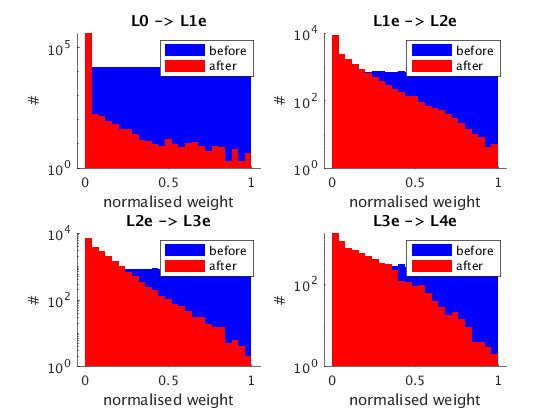

In [16]:
%% plot weight distributions
weights_names = {'L0 -> L1e'; 'L1e -> L2e'; 'L2e -> L3e'; 'L3e -> L4e'};
figure('Renderer', 'painters', 'Position', [10 10 600 150])
for i = 1:4
    subplot(2,2,i)
    box off
    hold on
    histogram(norm_weights{i,1},25,'EdgeColor','none','FaceColor',[0 0 1],'FaceAlpha',1);
    set(gca,'YScale','log');
    histogram(norm_weights{i,end},25,'EdgeColor','none','FaceColor',[1 0 0],'FaceAlpha',1);
    set(gca,'YScale','log');
    xlabel('normalised weight')
    ylabel('#')
    title(weights_names{i})
    legend('before','after')
    set(gcf, 'Renderer', 'Painters');
end

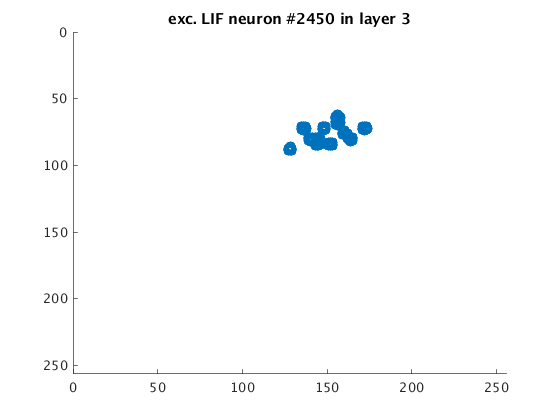

In [17]:
%% trace selective L3 neurons to inputs
neurons = 2450;
wghts4 = weights(4,end);wghts4 = wghts4{1,1};
wghts3 = weights(3,end);wghts3 = wghts3{1,1};
wghts2 = weights(2,end);wghts2 = wghts2{1,1};
wghts1 = weights(1,end);wghts1 = wghts1{1,1};
for l3_neuron = neurons
    inputs_to_l3_neuron = trace_to_inputs_l3(l3_neuron,wghts3);
    inputs_to_l2_neurons = [];
    inputs_to_l1_neurons = [];
    count = 0;
    for i=inputs_to_l3_neuron(2,:)
        count = count + 1;
        input = trace_to_inputs_l2(i,inputs_to_l3_neuron(4,count),wghts2);
        inputs_to_l2_neurons = [inputs_to_l2_neurons,input];
    end
    count = 0;
    for i=inputs_to_l2_neurons(2,:)
        count = count + 1;
        input = trace_to_inputs_l1(i,inputs_to_l2_neurons(4,count),wghts1);
        inputs_to_l1_neurons = [inputs_to_l1_neurons,input];
    end
    inputs_to_l1_neurons_px = bsxfun(@rdivide,inputs_to_l1_neurons(3:4,:),12.5e-6);
    inputs_to_l1_neurons(3:4,:) = inputs_to_l1_neurons_px;
    csvwrite(sprintf('weighted_inputs_l3_%s.csv',num2str(l3_neuron)),inputs_to_l1_neurons);
    figure
    scatter(inputs_to_l1_neurons(4,:),inputs_to_l1_neurons(3,:))
    xlim([0,256])
    ylim([0,256])
    set(gca, 'YDir','reverse')
    title(['exc. LIF neuron #',num2str(l3_neuron),' in layer 3'])
end

In [18]:
selective(89)


ans =

   668



In [19]:
size(inputs_to_l1_neurons)


ans =

           5        1143



In [20]:
% loop through selective neurons to find ones involved in PNGs
intralayer_weights = importdata('data/layer_4_exc_layer_4_exc_weights_8s_epoch_9.csv');
count = 0;
for nrn = selective
    count = count + 1;
    l3_neuron = nrn;
    % get all spike times
    spike_var = spikes{6,end-1,:};

    % find L4 neurons to which L3 neuron is connected 
    interlayer_weights = weights{4,end};
    conn_idx = find(interlayer_weights(1,:) == l3_neuron);
    l4_neurons = interlayer_weights(2,conn_idx);

    % check for connections between L4 neurons
    for i = l4_neurons

        % get layer 4 neurons to which neuron is connected
        l4_inputs_idx = find(intralayer_weights(2,:) == i);
        l4_inputs = intralayer_weights(1,l4_inputs_idx);

        % check if any of neuron's connections are also connected to our L3 neuron
        for j = l4_inputs % loop through inputs of chosen l4 neuron
            for k = l4_neurons % loop through other l4 neurons (may not need this - can simply replace k with l4_neurons???)
                if k == j & j ~= i % check if inputs of chosen l4 neuron match any other l4 neurons in list (ignoring self-connections)
                    str = ['For L3 #',num2str(l3_neuron),' (selective #', num2str(count), ') L4 #',num2str(i),' is connected to L4 #',num2str(k)];
                    disp(str);
                end
            end
        end 
    end
end

For L3 #407 (selective #51) L4 #919 is connected to L4 #854
For L3 #597 (selective #78) L4 #654 is connected to L4 #782
For L3 #680 (selective #95) L4 #492 is connected to L4 #557
For L3 #808 (selective #111) L4 #679 is connected to L4 #807
For L3 #817 (selective #113) L4 #1264 is connected to L4 #1266
For L3 #1006 (selective #147) L4 #1077 is connected to L4 #1076
For L3 #1184 (selective #167) L4 #1178 is connected to L4 #1243
For L3 #1184 (selective #167) L4 #1243 is connected to L4 #1178
For L3 #1713 (selective #225) L4 #2102 is connected to L4 #2038
For L3 #1981 (selective #241) L4 #2231 is connected to L4 #2296
For L3 #3068 (selective #330) L4 #2619 is connected to L4 #2556


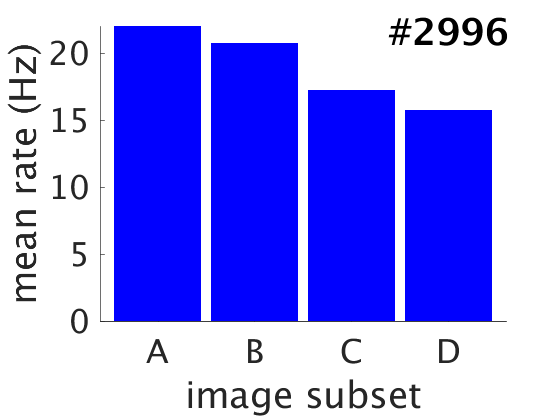

In [254]:
%% find selective L3 neurons

% define layer here
lay = 'L4e';
lay = find(strcmp(spikes_names,'L4e') == 1); % get layer index

% get average firing rates for specific image sets (see lab notebook)
rates_test_set1 = (rates{lay,end-1,set1(1)}{3}+rates{lay,end-1,set1(2)}{3}+rates{lay,end-1,set1(3)}{3}+rates{lay,end-1,set1(4)}{3})/4;
rates_test_set2 = (rates{lay,end-1,set2(1)}{3}+rates{lay,end-1,set2(2)}{3}+rates{lay,end-1,set2(3)}{3}+rates{lay,end-1,set2(4)}{3})/4;
rates_test_set3 = (rates{lay,end-1,set3(1)}{3}+rates{lay,end-1,set3(2)}{3}+rates{lay,end-1,set3(3)}{3}+rates{lay,end-1,set3(4)}{3})/4;
rates_test_set4 = (rates{lay,end-1,set4(1)}{3}+rates{lay,end-1,set4(2)}{3}+rates{lay,end-1,set4(3)}{3}+rates{lay,end-1,set4(4)}{3})/4;

selective = [];
 
neuron_num = [1:4096];
 
for num = neuron_num
    if rates_test_set1(num) >  rates_test_set2(num) && rates_test_set2(num) > rates_test_set3(num)  && rates_test_set3(num) > rates_test_set4(num) && rates_test_set4(num) ~= 0
        selective = [selective,num];
    end
end

nrn = 2996;

for num = 2996
%     figure('Position',[3000,600,200,200])
    figure('Position',[0,0,10,10])
    hold on
    data = [rates_test_set1(num),rates_test_set2(num),rates_test_set3(num),rates_test_set4(num)];%,L3e_rates_test_set4(num)]; 
    b = bar([1:4],data,0.9);
    b(1).EdgeColor = 'none';
    b(1).FaceColor = [0 0 1];
%     title(['exc. LIF neuron #',num2str(num),' in layer 3'])
    title(['#',num2str(num)], 'Position', [4 20])
    ylabel('mean rate (Hz)')
    xlabel('image subset')
    set(gca,'xtick',1:4);
    set(gca,'xticklabel',{'A', 'B', 'C', 'D'},'fontsize',25, 'color', 'None')
    xlim([0.4,4.6])
    set(gca,'OuterPosition',[0 0.01 1 1])
end

saveas(gcf, ['firing_rates_l4_' num2str(nrn) '.eps'], 'epsc')
saveas(gcf, ['firing_rates_l4_' num2str(nrn) '.png'])

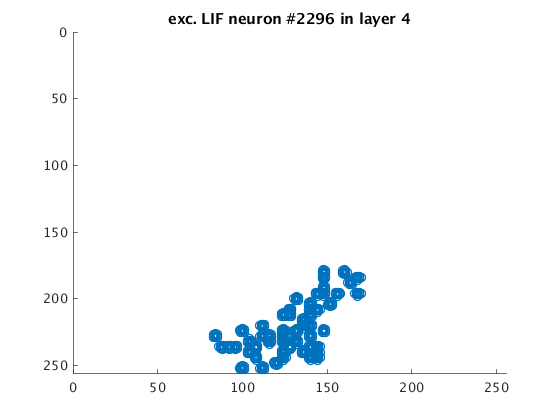

In [23]:
for l4_neuron = 2296
    inputs_to_l4_neuron = trace_to_inputs_l4(l4_neuron,wghts4);
    inputs_to_l3_neurons = [];
    inputs_to_l2_neurons = [];
    inputs_to_l1_neurons = [];
    count = 0;
    for i=inputs_to_l4_neuron(2,:)
        count = count + 1;
        input = trace_to_inputs_l3_for_l4(i,inputs_to_l4_neuron(4,count),wghts3);
        inputs_to_l3_neurons = [inputs_to_l3_neurons,input];
    end
    count = 0;
    for i=inputs_to_l3_neurons(2,:)
        count = count + 1;
        input = trace_to_inputs_l2(i,inputs_to_l3_neurons(4,count),wghts2);
        inputs_to_l2_neurons = [inputs_to_l2_neurons,input];
    end
    count = 0;
    for i=inputs_to_l2_neurons(2,:)
        count = count + 1;
        input = trace_to_inputs_l1(i,inputs_to_l2_neurons(4,count),wghts1);
        inputs_to_l1_neurons = [inputs_to_l1_neurons,input];
    end
    inputs_to_l1_neurons_px = bsxfun(@rdivide,inputs_to_l1_neurons(3:4,:),12.5e-6);
    inputs_to_l1_neurons(3:4,:) = inputs_to_l1_neurons_px;
    csvwrite(sprintf('weighted_inputs_l4_%s.csv',num2str(l4_neuron)),inputs_to_l1_neurons);
    figure
    scatter(inputs_to_l1_neurons(4,:),inputs_to_l1_neurons(3,:))
    xlim([0,256])
    ylim([0,256])
    set(gca, 'YDir','reverse')
    title(['exc. LIF neuron #',num2str(l4_neuron),' in layer 4'])
end

In [185]:
%% plot spikes - turn this into a function which takes 
epoch = 10;
% create logical signal for spike series of L3 neuron

fs = 1000;  % sampling frequency in Hz (max rate a neuron can fire is 100Hz so > 200Hz satisfies Nyquist Theorem)
T = 16;     % period of signal in s 
l3_neuron = 1981;
L3_spike_series = zeros([1,fs * T]);
for im = [1:16]
    spike_var = spikes{6,epoch,im};
    for spike_idx = [1:length(spike_var)]
        if spike_var(1,spike_idx) == l3_neuron
            time_idx = cast((spike_var(2,spike_idx) - (16 * (epoch-1))) * fs,'int64');
            L3_spike_series(time_idx+1) = 1; 
        end
    end
end

% create logical signal for spike series of L4 neuron 1
l4_neuron_a = 2296;
L4a_spike_series = zeros([1,fs*T]);
for im = [1:16]
    spike_var = spikes{8,end-1,im};
    for spike_idx = [1:length(spike_var)]
        if spike_var(1,spike_idx) == l4_neuron_a
            time_idx = cast((spike_var(2,spike_idx) - (16 * (epoch-1))) * fs,'int64');
            L4a_spike_series(time_idx+1) = 1;  
        end
    end
end

% create logical signal for spike series of L4 neuron 2
l4_neuron_b = 2231;
L4b_spike_series = zeros([1,fs*T]);
for im = [1:16]
    spike_var = spikes{8,end-1,im};
    for spike_idx = [1:length(spike_var)]
        if spike_var(1,spike_idx) == l4_neuron_b
            time_idx = cast((spike_var(2,spike_idx) - (16 * (epoch-1))) * fs,'int64');
            L4b_spike_series(time_idx+1) = 1;    
        end
    end
end


marker_size =

   100



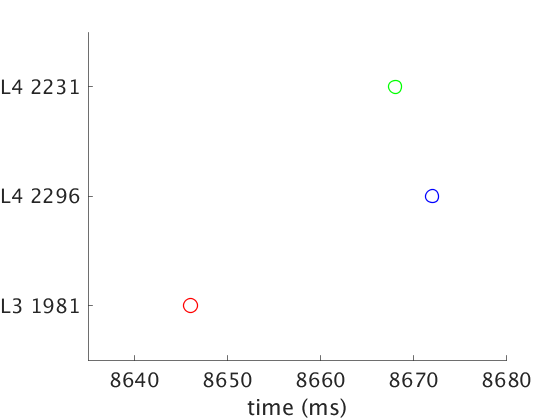

In [253]:
% plot spike series for selected PNG
time_ax = 0:1/1000:16;
figure('Renderer', 'painters', 'Position', [10 10 100 600])
marker_size = 100
scatter(time_ax(1:end-1) .* 1000, L3_spike_series, marker_size, 'r', 'o')
hold on
scatter(time_ax(1:end-1) .* 1000, L4a_spike_series .* 2, marker_size, 'b', 'o')
scatter(time_ax(1:end-1) .* 1000, L4b_spike_series .* 3, marker_size, 'g', 'o')
xlim([8635, 8680])
ylim([0.5, 3.5])
yticks([1, 2, 3])
yticklabels([['L3 ', num2str(l3_neuron)]; ['L4 ', num2str(l4_neuron_a)]; ['L4 ', num2str(l4_neuron_b)]])
xlabel('time (ms)')
set(gca,'fontsize',15, 'color', 'None')
saveas(gcf, 'l3_1981_png.png')
saveas(gcf, 'l3_1981_png.eps', 'epsc')


marker_size =

   100



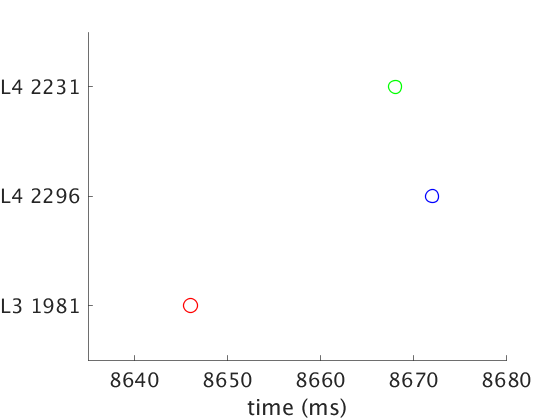

In [282]:
% plot spike series for selected PNG
time_ax = 0:1/1000:16;
figure('Renderer', 'painters', 'Position', [10 10 100 600])
marker_size = 100
scatter(time_ax(1:end-1) .* 1000, L3_spike_series, marker_size, 'r', 'o')
hold on
scatter(time_ax(1:end-1) .* 1000, L4a_spike_series .* 2, marker_size, 'b', 'o')
scatter(time_ax(1:end-1) .* 1000, L4b_spike_series .* 3, marker_size, 'g', 'o')
xlim([8635, 8680])
ylim([0.5, 3.5])
yticks([1, 2, 3])
yticklabels([['L3 ', num2str(l3_neuron)]; ['L4 ', num2str(l4_neuron_a)]; ['L4 ', num2str(l4_neuron_b)]])
xlabel('time (ms)')
set(gca,'fontsize',15, 'color', 'None')

In [295]:
% get spike times for l3 neuron
l3_spike_times = time_ax(find(L3_spike_series == 1)) .* 1000;
l4a_spike_times = time_ax(find(L4a_spike_series == 1)) .* 1000;
l4b_spike_times = time_ax(find(L4b_spike_series == 1)) .* 1000;

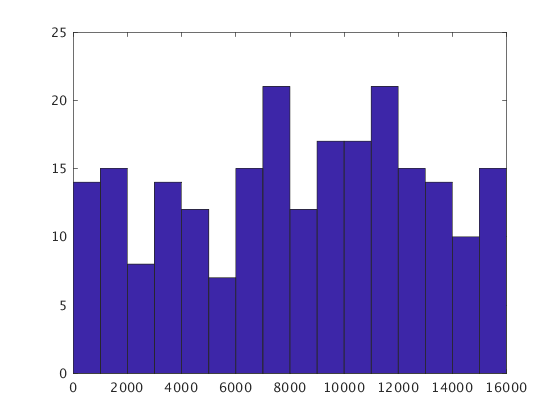

In [296]:
hist(l4b_spike_times, 16)

In [298]:
range = [8640, 8675];
for time = l3_spike_times
    if time > range(1) & time < range(2)
        disp(['L3 #', num2str(l3_neuron), ' spike: ', num2str(time), ' ms'])  
    end
end
for time = l4a_spike_times
    if time > range(1) & time < range(2)
        disp(['L4 #', num2str(l4_neuron_a), ' spike: ', num2str(time), ' ms'])  
    end
end
for time = l4b_spike_times
    if time > range(1) & time < range(2)
        disp(['L4 #', num2str(l4_neuron_b), ' spike: ', num2str(time), ' ms'])  
    end
end

L3 #1981 spike: 8646 ms
L4 #2296 spike: 8672 ms
L4 #2231 spike: 8668 ms


In [300]:
8668 - 8646
8672 - 8646


ans =

    22


ans =

    26

